In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from matplotlib import style
style.use("ggplot")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Unsupervised Learning
+ <b>Definition:</b>  no known output, no teacher to instruct the learning algorithm
+ <b>Motivation:</b> Data visualization
<br><br>
+ <b>Types:</b>  
    + Transformation (dimentionality reduction)
    + Clustering
<br><br>    
+ <b>Major Challeges</b>
    + Hard to evaluating whether the algorithm learned something useful. 

<hr/>
#### Preprocessing and scaling
+ <b>Standard scaler </b>
    + Ensure mean is 0, variance is 1
    + Does not ensure any particular minimum and maximum values for the features
+ <b>Robust scaler</b>
    + Use median and quantiles
    + Robust to outliers
+ <b>MinMax scaler</b>
+ <b>Normalizer</b>
    + Ensure Euclidean length of every data point is 1 (project every point to a circle or sphere which radius is 1)
    + Used only the direction of data matters

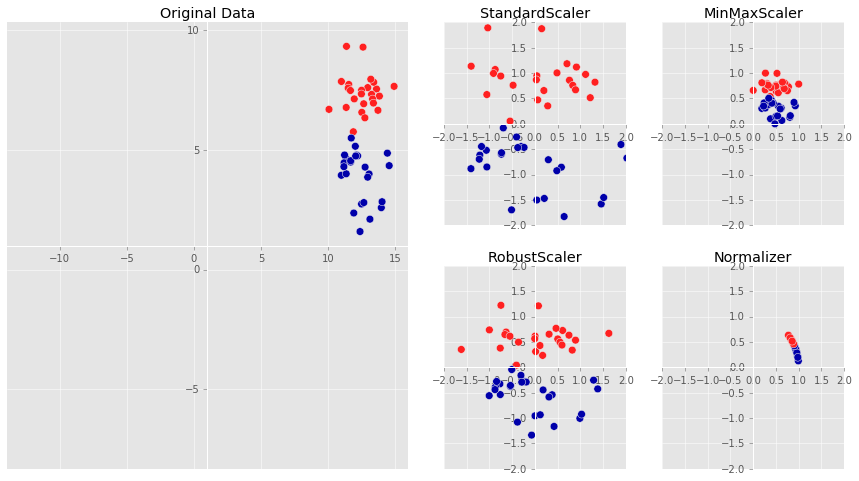

In [7]:
mglearn.plots.plot_scaling()

#### Example of Breast cancer dataset

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 0)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(C = 100)
svm.fit(X_train_scaled, y_train)

print "Accuracy on the trainning dataset: {:.2f}".format(svm.score(X_train, y_train))
print "Accuracy on the testing dataset: {:.2f}".format(svm.score(X_test, y_test))
print "\n"
print "Accuracy on the scaled trainning dataset: {:.2f}".format(svm.score(X_train_scaled, y_train))
print "Accuracy on the scaled testing dataset: {:.2f}".format(svm.score(X_test_scaled, y_test))

Accuracy on the trainning dataset: 0.63
Accuracy on the testing dataset: 0.63


Accuracy on the scaled trainning dataset: 0.99
Accuracy on the scaled testing dataset: 0.94


#### See? It is cool.

#### Dimentionality Reduction
+ <b>PCA:</b> Reconstruct data
+ <b>NMF:</b> Just extract features
+ <b>t-SNE:</b> Just for visualization

I'm quite familiar with PCA, so skipped it.

<b>NMF:</b>
+ Similar to PCA, but without negative coefficients, interpretation will be more easier compared to PCA.
+ Ensure data is positive before processing

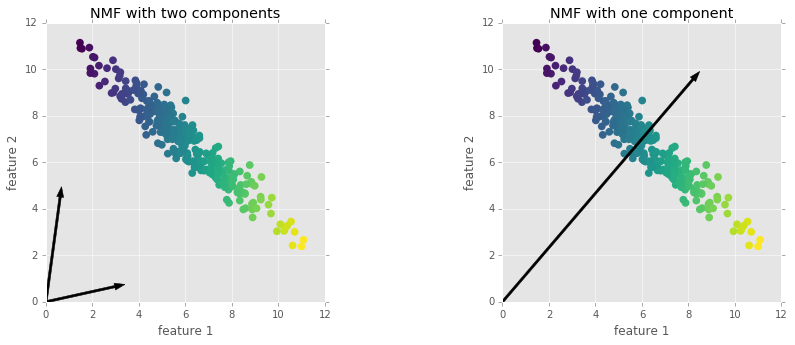

In [17]:
mglearn.plots.plot_nmf_illustration()

#### What could we learn from the picture above?
+ All data can be written as the combination of that two vectors
    + If two vectors, NMF choose the most extremist vectors that can represent the  data
    + if one vector, NMF choose the most expliannable vector
    + Differ from PCA, NMF does not change or generated a new space

<hr/>
### Clustering
+ <b>k-Means</b>
    + Only can be used in convex distributions
    + All cluster have the same diameter in some aspect
    + All directions are equally important for each cluster

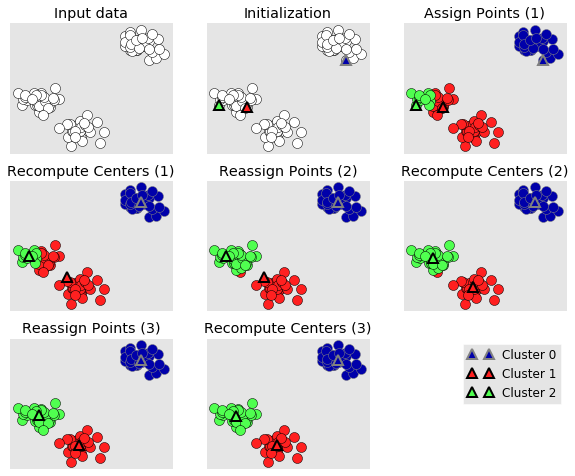

In [18]:
mglearn.plots.plot_kmeans_algorithm()

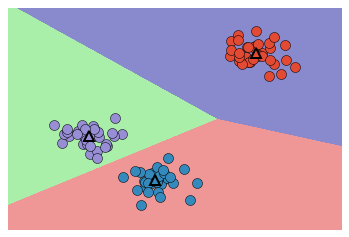

In [19]:
mglearn.plots.plot_kmeans_boundaries()

In [22]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state = 1)

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

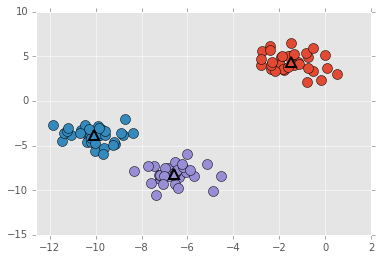

In [23]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
markers='^', markeredgewidth=2)

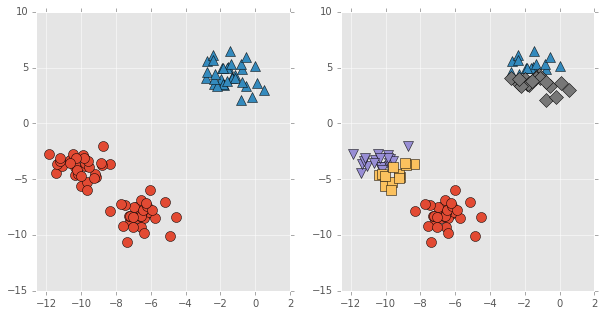

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])
# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

#### Failure cases of k-Means
+ Non-convex shape
+ Different diameter in some sense
+ Importance of the all direction is not the same
+ Complex shape

#### k-Means drawbacks
+ It relies on a random initialization, scikit-learn run 10 times of 10 different random seeds and returns the best.
+ Restriction on the shape of clusters
+ Need to specify the number of clusters

<hr/>
### Agglomerative clustring

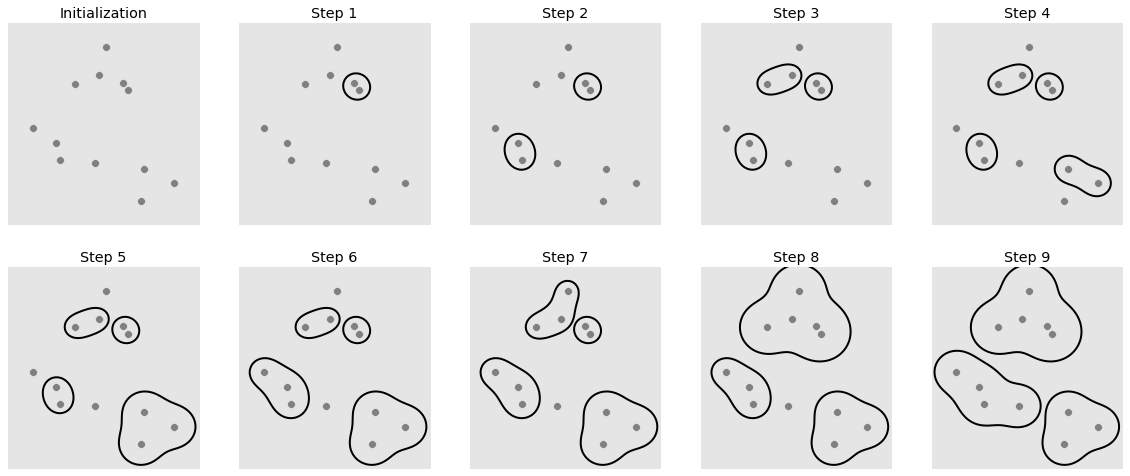

In [26]:
mglearn.plots.plot_agglomerative_algorithm()

C:\Anaconda2\lib\site-packages\mglearn\plot_helpers.py:95: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
  lines.append(ax.plot(x1[mask], x2[mask], markers[i], markersize=s,


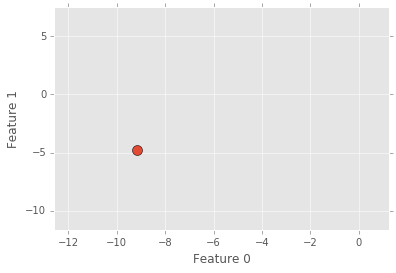

In [27]:
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state = 1)
agg = AgglomerativeClustering(n_clusters = 3)
assignment = agg.fit(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

<hr/>
### Hierarchical clustring and dendrograms

Still can not worked well in the non-convex data

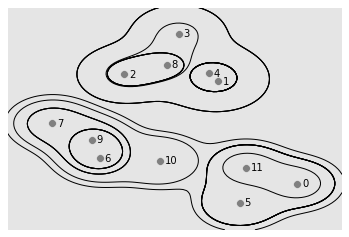

In [28]:
mglearn.plots.plot_agglomerative()

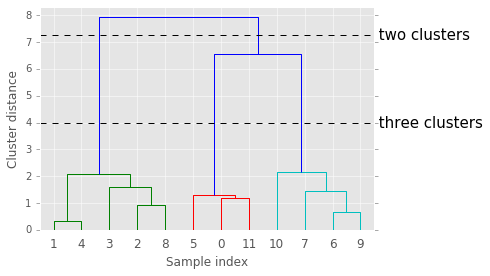

In [30]:
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state = 0, n_samples = 12)

linkage_array = ward(X)
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

#### DBSCAN
The main benifits of DBSCAN:
+ it does not require the user to set the number of clusters a priori
+ it can capture clusters of complex shapes.
+ it can identify points that are not part of any cluster (outlier). 